In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as la

In [3]:
x_train = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
                    4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8])
y_train = np.array([0.169, 0.164, 0.210, 0.215, 0.183, 0.181, 0.188, 0.229,
                    0.268, 0.202, 0.193, 0.262, 0.215, 0.285, 0.313, 0.222, 0.225,
                    0.326, 0.283, 0.374, 0.406, 0.304, 0.284, 0.463, 0.456, 0.598, 0.618,
                    0.475, 0.425, 0.554, 0.810, 1.011, 0.999, 0.751, 0.742, 1.273, 1.300,
                    1.612, 1.588, 1.225, 1.208])

In [4]:
def model(x, truth_beta):
    return truth_beta[0]*np.exp(x/truth_beta[1])


def Fval(x, y, beta):
    return model(x, beta) - y


def Jac(x, beta):
    return np.array([np.exp(x/beta[1]), -(beta[0]/beta[1]**2)*np.exp(x/beta[1])*x])

Iteration:  0 -- Error: 4.3734e+04
Iteration:  1 -- Error: 3.6263e+04
Iteration:  2 -- Error: 3.0173e+04
Iteration:  3 -- Error: 2.5198e+04
Iteration:  4 -- Error: 2.1125e+04
Iteration:  5 -- Error: 1.7781e+04
Iteration:  6 -- Error: 1.5026e+04
Iteration:  7 -- Error: 1.2747e+04
Iteration:  8 -- Error: 1.0855e+04
Iteration:  9 -- Error: 9.2753e+03
Iteration: 10 -- Error: 7.9510e+03
Iteration: 11 -- Error: 6.8347e+03
Iteration: 12 -- Error: 5.8892e+03
Iteration: 13 -- Error: 5.0843e+03
Iteration: 14 -- Error: 4.3962e+03
Iteration: 15 -- Error: 3.8054e+03
Iteration: 16 -- Error: 3.2964e+03
Iteration: 17 -- Error: 2.8566e+03
Iteration: 18 -- Error: 2.4756e+03
Iteration: 19 -- Error: 2.1450e+03
Iteration: 20 -- Error: 1.8578e+03
Iteration: 21 -- Error: 1.6082e+03
Iteration: 22 -- Error: 1.3911e+03
Iteration: 23 -- Error: 1.2025e+03
Iteration: 24 -- Error: 1.0385e+03
Iteration: 25 -- Error: 8.9626e+02
Iteration: 26 -- Error: 7.7292e+02
Iteration: 27 -- Error: 6.6613e+02
Iteration: 28 -- Err

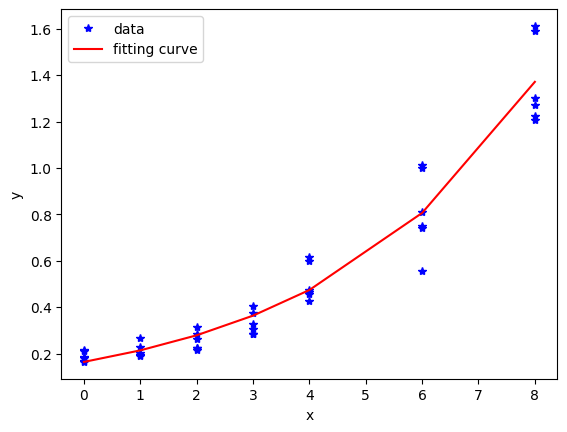

In [9]:
# Damped Gauss-Newton Method
def GN_damped(Fx, Jac, x, y, beta0, stepsize=1, maxiter=100, tol=1e-3):
    bet = beta0
    err = 0
    t = 0
    while t < maxiter:
        Ft = Fx(x, y, bet)
        Jt = Jac(x, bet)
        St = la.pinv(Jt.dot(Jt.T))
        yt = Jt.dot(Ft).T
        dt = np.ravel(St.dot(yt))
        err = la.norm(yt)
        bet = bet - stepsize * dt
        print("Iteration: {0:2d}".format(t), "-- Error: {0:5.4e}".format(err))
        if err <= tol:
            print(">>> Convergence achieved!")
            break
        t += 1
    return bet, err, t


# We run it.
beta0 = [1, 2]
beta_best, err, n_it = GN_damped(Fval, Jac, x_train, y_train, beta0=beta0, stepsize=0.1, maxiter=1000)
print("\nParameters:", beta_best, "\nError: ",
      err, "\nNumber of Iterations: ", n_it)

# Plotting
plt.plot(x_train, y_train, 'b*', label='data')
plt.plot(x_train, model(x_train, beta_best), "-r", label="fitting curve")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()